In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/utsav/Documents/PCL-2/Code')

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
missing_values = df.isnull().sum()
missing_values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
summary_statistics = df.describe()
summary_statistics

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

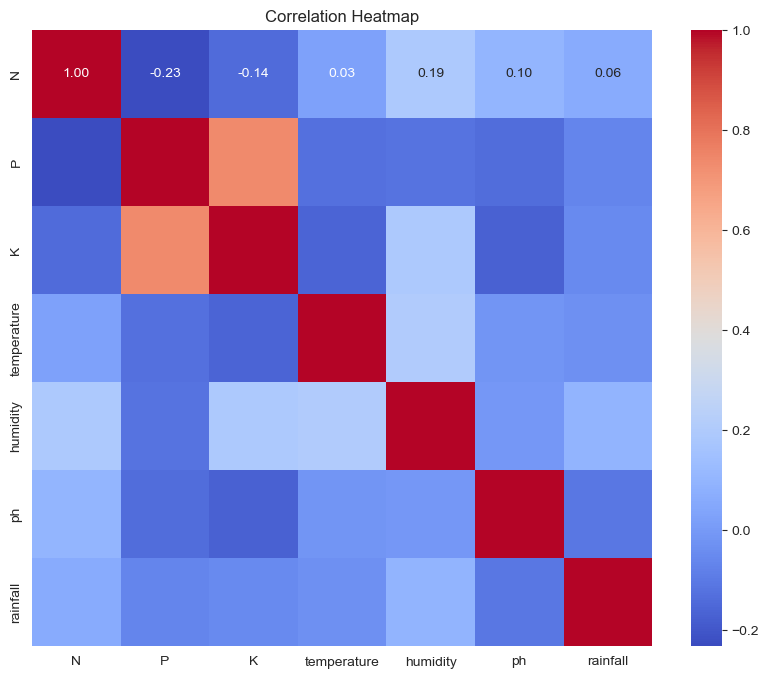

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.drop('label', axis=1).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

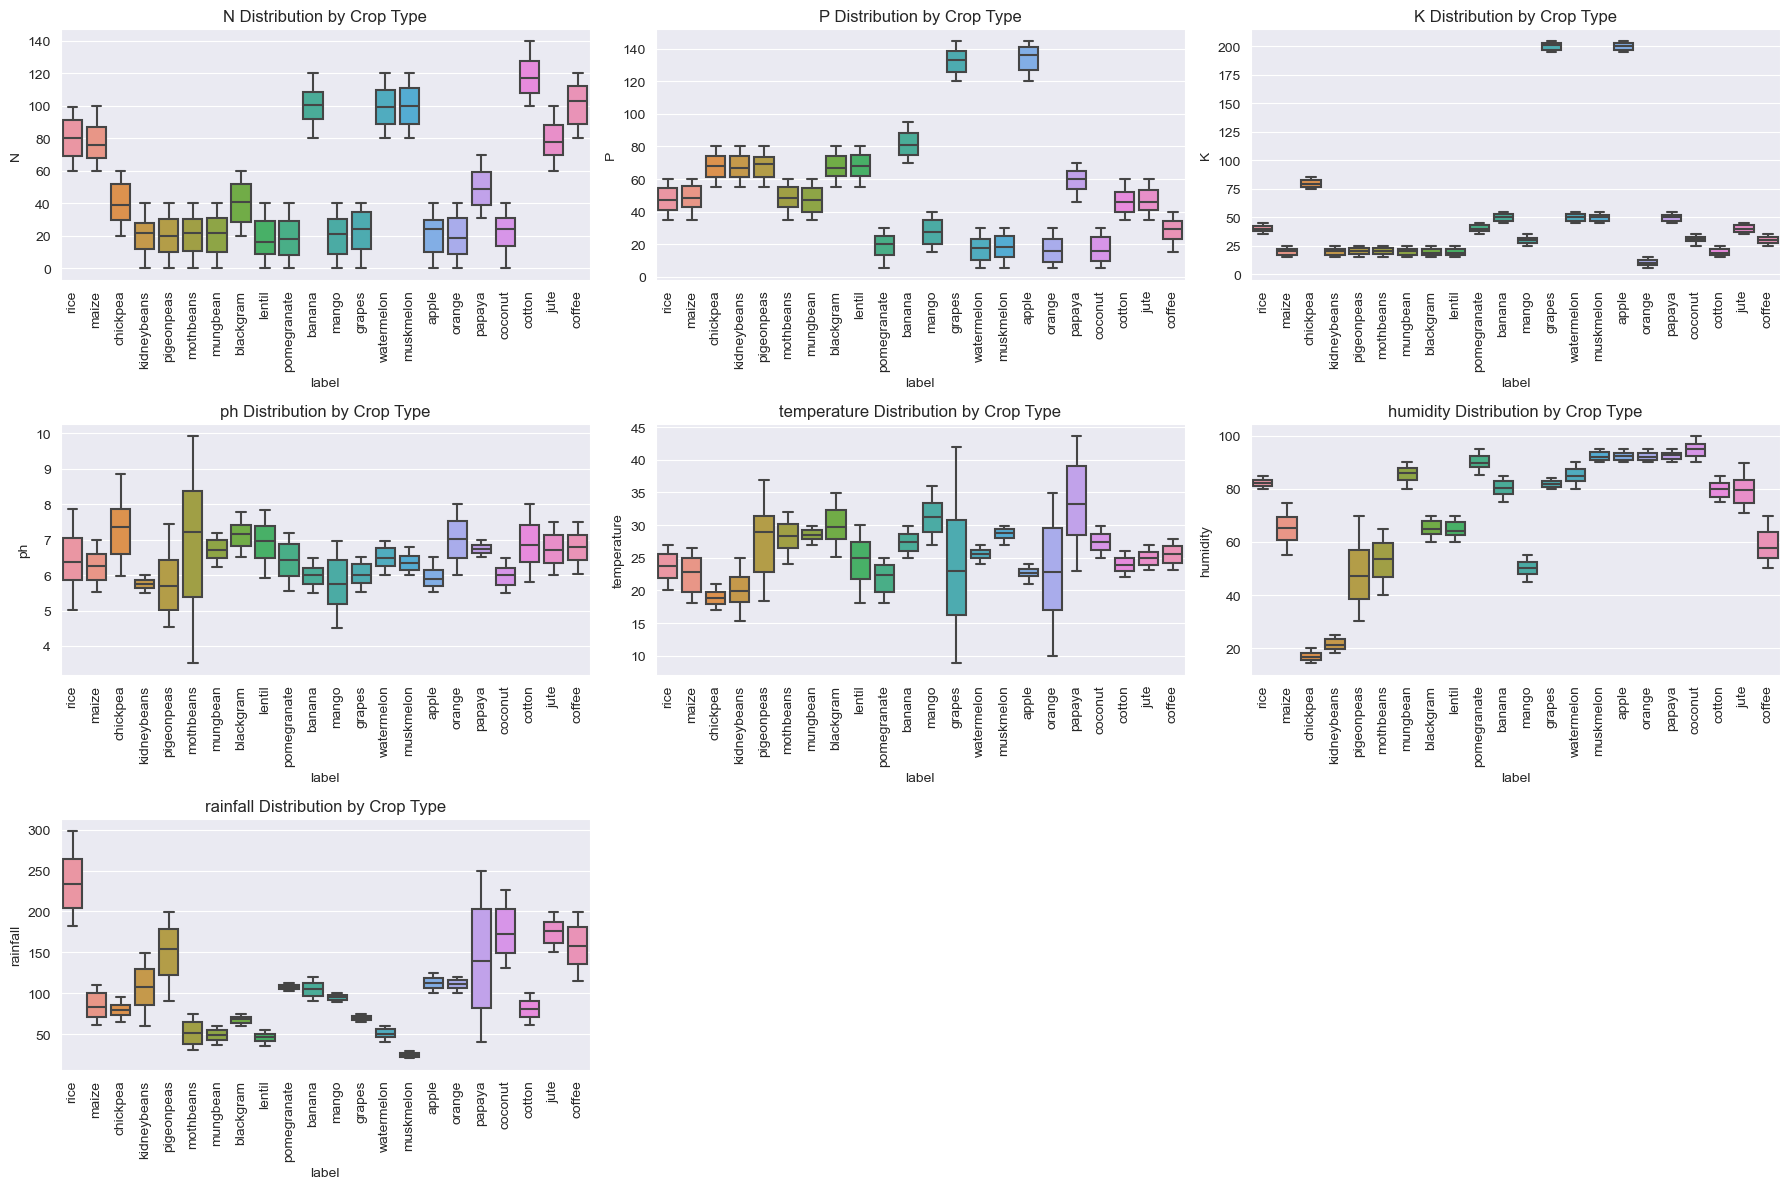

In [8]:
subset_features = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']

# Creating box plots for each of the selected features against the crop type
plt.figure(figsize=(18, 12))  # Adjusted for better fit

for index, feature in enumerate(subset_features):
    plt.subplot(3, 3, index + 1)  # Adjusted to a 3x3 grid
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} Distribution by Crop Type')
    plt.xticks(rotation=90)  # Rotating x labels for better readability

plt.tight_layout()
plt.show()

In [9]:
X = df.drop('label', axis=1)

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)  # sparse=False means you get a dense matrix
y = df['label']
y_categorical = encoder.fit_transform(np.array(y).reshape(-1, 1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
categories = encoder.categories_[0]
for i, category in enumerate(categories):
    one_hot_vector = np.zeros(len(categories))
    one_hot_vector[i] = 1
    print(f"{category}: {one_hot_vector}")

apple: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
banana: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
blackgram: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
chickpea: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
coconut: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
coffee: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
cotton: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
grapes: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
jute: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
kidneybeans: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lentil: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
maize: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mango: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mothbe

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Neural network architecture
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 128 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer
])

# Compiling the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,710 (41.84 KB)

 Trainable params: 10,710 (41.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2, verbose=2)

Epoch 1/20


In [14]:
import tensorflow as tf
model = tf.keras.models.load_model('/Users/utsav/Documents/PCL-2/Code/Website/crop_recommendation_model.keras')

In [ ]:
# Evaluating the model on the test set
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

y_test_labels = np.argmax(y_test, axis=1)

# Convert predicted probabilities into class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = (accuracy_score(y_test_labels, predicted_labels))*100
print("Accuracy:", accuracy)

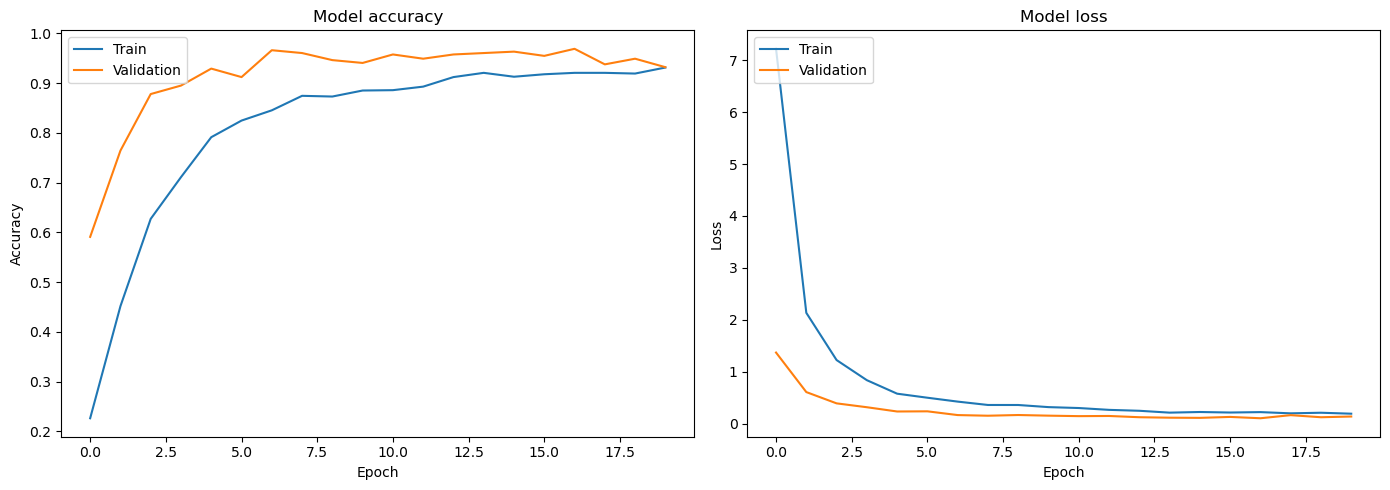

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [18]:
import numpy as np 

#N P K TEMP HUMIDITY PH Rain
new_data = np.array([[86.406,18.46,67.2,19,48,7.2,437.6]])
new_data

array([[ 86.406,  18.46 ,  67.2  ,  19.   ,  48.   ,   7.2  , 437.6  ]])

In [19]:
actual_categories = encoder.categories_[0]
actual_categories

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [20]:
predictions = model.predict(new_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[4.3431506e-25 5.0659414e-29 0.0000000e+00 1.2446160e-21 1.2887337e-19
  7.2298980e-09 0.0000000e+00 3.6182329e-34 9.1617035e-12 5.9372081e-29
  8.1437692e-35 4.2147101e-20 1.4775017e-18 1.3859269e-32 0.0000000e+00
  8.0282235e-35 1.1778026e-30 4.0468333e-21 1.5048629e-17 1.3824962e-30
  1.0000000e+00 6.8602986e-37]]


In [21]:
# Finding indices of the top 3 highest values in the predictions array
top_3_crop_indices = np.argsort(predictions, axis=1)[0][-3:][::-1]

# Mapping indices to actual categories
top_3_crops = [actual_categories[index] for index in top_3_crop_indices]

In [22]:
top_3_crops

['rice', 'coffee', 'jute']

In [23]:
top_3_crop_indices

array([20,  5,  8])

In [24]:
top_20_crop_indices = np.argsort(predictions, axis=1)[0][-20:][::-1]
top_20_crop_indices

array([20,  5,  8, 18, 12,  4, 11, 17,  3,  0,  9,  1, 19, 16, 13,  7, 10,
       15, 21,  6])

In [25]:
top_20_crops = [actual_categories[index] for index in top_20_crop_indices]
top_20_crops

['rice',
 'coffee',
 'jute',
 'pigeonpeas',
 'mango',
 'coconut',
 'maize',
 'papaya',
 'chickpea',
 'apple',
 'kidneybeans',
 'banana',
 'pomegranate',
 'orange',
 'mothbeans',
 'grapes',
 'lentil',
 'muskmelon',
 'watermelon',
 'cotton']

In [26]:
states_dict = {
    "Andhra Pradesh": ["Rice", "Maize", "Pigeonpeas", "Sugarcane", "Cotton", "Banana", "Mango", "Groundnut"],
    "Arunachal Pradesh": ["Rice", "Maize", "Millet", "Ginger", "Chillies", "Oilseeds", "Orange"],
    "Assam": ["Tea", "Rice", "Maize", "Jute", "Pulses", "Oilseeds", "Sugarcane"],
    "Bihar": ["Rice", "Wheat", "Maize", "Pulses", "Oilseeds", "Sugarcane", "Jute"],
    "Chhattisgarh": ["Rice", "Maize", "Pulses", "Oilseeds", "Sugarcane", "Jute", "Tobacco"],
    "Goa": ["Rice", "Coconut", "Cashew nuts", "Arecanut"],
    "Gujarat": ["Cotton", "Groundnut", "Castor", "Bajra", "Tur", "Green gram", "Sesamum", "Paddy", "Maize", "Sugarcane"],
    "Haryana": ["Wheat", "Rice", "Sugarcane", "Barley", "Gram", "Sunflower", "Rapeseed", "Mustard", "Cotton"],
    "Himachal Pradesh": ["Maize", "Wheat", "Barley", "Rice", "Apple", "Citrus fruits", "Stone fruits", "Tobacco"],
    "Jharkhand": ["Rice", "Maize", "Pulses", "Oilseeds", "Sugarcane"],
    "Karnataka": ["Rice", "Maize", "Pulses", "Oilseeds", "Sugarcane", "Coffee", "Rubber", "Tea", "Cashews", "Cardamom", "Chillies"],
    "Kerala": ["Coconut", "Rubber", "Coffee", "Pepper", "Cashewnuts", "Ginger", "Turmeric", "Tea", "Cardamom", "Cinnamon"],
    "Madhya Pradesh": ["Wheat", "Rice", "Gram", "Maize", "Soyabean", "Pulses", "Oilseeds", "Cotton"],
    "Maharashtra": ["Rice", "Jowar", "Bajra", "Maize", "Wheat", "Pulses", "Oilseeds", "Sugarcane", "Cotton", "Grapes"],
    "Manipur": ["Rice", "Maize", "Pulses", "Fruits", "Vegetables", "Spices", "Orange"],
    "Meghalaya": ["Rice", "Maize", "Pulses", "Oilseeds", "Fruits", "Vegetables", "Spices"],
    "Mizoram": ["Rice", "Maize", "Pulses", "Oilseeds", "Fruits", "Vegetables", "Spices"],
    "Nagaland": ["Rice", "Maize", "Pulses", "Oilseeds", "Fruits", "Vegetables", "Spices"],
    "Odisha": ["Rice", "Pulses", "Oilseeds", "Sugarcane", "Jute", "Cotton", "Tobacco", "Mango", "Papaya"],
    "Punjab": ["Wheat", "Rice", "Maize", "Barley", "Gram", "Mustard", "Sugarcane", "Cotton"],
    "Rajasthan": ["Wheat", "Barley", "Maize", "Millets", "Pulses", "Oilseeds", "Cotton", "Sugarcane", "Mango", "Pomegranate"],
    "Sikkim": ["Rice", "Maize", "Barley", "Buckwheat", "Potatoes", "Large cardamom", "Ginger", "Fruits", "Vegetables", "Orange"],
    "Tamil Nadu": ["Rice", "Jowar", "Bajra", "Maize", "Ragi", "Pulses", "Oilseeds", "Sugarcane", "Coconut", "Groundnut", "Cotton", "Coffee", "Papaya"],
    "Telangana": ["Rice", "Maize", "Pulses", "Oilseeds", "Sugarcane", "Chillies", "Turmeric", "Tobacco", "Cotton", "Mango", "Pomegranate"],
    "Tripura": ["Rice", "Maize", "Pulses", "Oilseeds", "Fruits", "Vegetables", "Rubber"],
    "Uttar Pradesh": ["Wheat", "Rice", "Sugarcane", "Barley", "Gram", "Pulses", "Oilseeds", "Cotton", "Mango", "Papaya"],
    "Uttarakhand": ["Rice", "Maize", "Wheat", "Barley", "Millets", "Pulses", "Oilseeds", "Fruits", "Vegetables"],
    "West Bengal": ["Rice", "Jute", "Sugarcane", "Wheat", "Maize", "Pulses", "Oilseeds", "Fruits", "Vegetables", "Spices", "Mango", "Orange", "Banana", "Papaya"]
}

In [27]:
state_input = input("Enter the state: ")

Enter the state: Punjab


In [28]:
crop_list = []
if state_input in states_dict:
    for i in states_dict[state_input]:
        for j in top_20_crops:
            if j in i.lower():
                crop_list.append(j)
    print(crop_list)
    
else:
    print("State not found in the dataset.")

['rice', 'maize', 'cotton']


In [ ]:
# Save the model in the recommended Keras format
model_path = '/Users/utsav/Documents/PCL-2/Code/Website/crop_recommendation_model.keras'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
model.save(model_path)  # Ensure it's .keras extension
print(f"Model saved to {model_path}")